In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm_pvals_inits import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
# from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
list(model.initial_conditions)

[(A20(brip=None), Parameter('A20_0', 9075.0)),
 (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0)),
 (cIAP(btraf=None), Parameter('cIAP_0', 8986.0)),
 (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9075.0)),
 (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)),
 (FLIP(bDED=None, state='A'), Parameter('FLIP_0', 3910.0)),
 (LUBAC(brip=None), Parameter('LUBAC_0', 7226.0)),
 (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)),
 (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'),
  Parameter('RIP1_0', 22044.0)),
 (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)),
 (TNF(brec=None), Parameter('TNF_0', 2326.0)),
 (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4809.0)),
 (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None),
  Parameter('TRADD_0', 4696.0)),
 (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'),
  Parameter('TRAF_0', 11776.0)

In [9]:
c0old = np.load('../../sensitivity_analysis/NecroptosisSens/cluster0/necro_pars10k_cluster0_5720_mod.npy')[:,14:]
c0 = np.load('../../param_files/necro_pars10k_cluster1_5720_modwo5.npy')[:,14:]
c1 = np.load('../../sensitivity_analysis/NecroptosisSens/cluster1/necro_pars10k_cluster1_5720_mod.npy')[:,14:]
c2 = np.load('../../sensitivity_analysis/NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')[:,14:]
c3 = np.load('../../sensitivity_analysis/NecroptosisSens/cluster3/necro_pars10k_cluster3_5720_mod.npy')[:,14:]

In [10]:
print(len(c0old))

3644


In [ ]:
print(c3[0])

In [4]:
c3extra = np.load('../../param_files/most_likely_par_10k_necropydream_may72020_667extra.npy')
c3extra = 10**c3extra

In [ ]:
print(c3all[0])

In [ ]:
print(all_parsc3all[0])

In [ ]:
print(list(model.initial_conditions))

In [5]:
c3all = np.concatenate([c3,c3extra])

In [ ]:
print(c3all[3400])

In [ ]:
list(model.initial_conditions)

In [6]:
n_pars = len(c3all)
all_parsc3all = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = c3all[i]
    param_values[rate_mask] = par
    all_parsc3all[i] = param_values
print(len(all_parsc3all))    

3489


In [24]:
np.save('../../params_testing/necro_pars10k_mode1_5720_mod.npy', all_pars0)
np.save('../../params_testing/necro_pars10k_mode2_5720_mod.npy', all_parsc3all)
np.save('../../params_testing/necro_pars10k_mode3_5720_mod.npy',all_pars2)
np.save('../../params_testing/necro_pars10k_mode4_5720_mod.npy',all_pars1)

In [7]:
n_pars = len(c0)
all_pars0 = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = c0[i]
    param_values[rate_mask] = par
    all_pars0[i] = param_values
print(len(all_pars0))    

3605


In [ ]:
all_pars0[0]

In [11]:
n_pars = len(c1)
all_pars1 = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = c1[i]
    param_values[rate_mask] = par
    all_pars1[i] = param_values
print(len(all_pars1))        

1492


In [12]:
n_pars = len(c2)
all_pars2 = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = c2[i]
    param_values[rate_mask] = par
    all_pars2[i] = param_values
print(len(all_pars2))    

2042


In [13]:
n_pars = len(c3)
all_pars3 = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = c3[i]
    param_values[rate_mask] = par
    all_pars3[i] = param_values
print(len(all_pars3))    

2822


In [14]:
tspan = np.linspace(0,1800, 500)

In [15]:
solverwtm0 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm0  = solverwtm0.run(param_values=all_pars0, num_processors = 25)
mode1df_wtm0 = mode1wtm0.dataframe

2022-01-12 15:54:35.018 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-12 15:54:35.811 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-12 15:54:35.914 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-12 15:54:36.125 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 25 processes
2022-01-12 15:58:55.428 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-12 15:58:55.431 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-12 15:58:58.454 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [16]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=all_pars1, num_processors = 25)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-12 15:59:01.695 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-12 15:59:01.701 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-12 15:59:01.734 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-12 15:59:01.836 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 25 processes
2022-01-12 15:59:58.597 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-12 15:59:58.598 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-12 15:59:59.630 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [17]:
solverwtm2 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm2  = solverwtm2.run(param_values=all_pars2, num_processors = 25)
mode1df_wtm2 = mode1wtm2.dataframe

2022-01-12 16:00:00.976 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-12 16:00:00.981 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-12 16:00:01.015 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-12 16:00:01.142 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 25 processes
2022-01-12 16:01:40.345 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-12 16:01:40.348 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-12 16:01:41.784 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [18]:
solverwtm3 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm3  = solverwtm3.run(param_values=all_pars3, num_processors = 25)
mode1df_wtm3 = mode1wtm3.dataframe

2022-01-12 16:01:43.648 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-12 16:01:43.654 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-12 16:01:43.688 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-12 16:01:43.852 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 25 processes
2022-01-12 16:04:37.449 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-12 16:04:37.451 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-12 16:04:39.620 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [19]:
solverwtm31 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm31  = solverwtm31.run(param_values=all_parsc3all, num_processors = 25)
mode1df_wtm31 = mode1wtm31.dataframe

2022-01-12 16:04:42.122 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Simulator created
2022-01-12 16:04:42.127 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Equation mode set to "cython"
2022-01-12 16:04:42.161 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] Simulation(s) started
2022-01-12 16:04:42.357 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] Multi-processor (parallel) mode using 25 processes
2022-01-12 16:08:54.491 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals_inits] All simulation(s) complete
2022-01-12 16:08:54.494 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor started
2022-01-12 16:08:57.172 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals_inits] SimulationResult constructor finished


In [ ]:
df_threshtimesc2100wt = m3alldf100wt.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100a20   = c2df100a202.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesc2100cyld = c2df100cyld.groupby('simulation').apply(lambda x: (x > threshold).idxmax()).apply(lambda x: [y[1] for y in x])

In [ ]:
thresh = 2772
ttd0 = []
for j in range(len(all_pars0)):
    print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm0.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm0.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd0.append(mode1df_wtm0.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd0.append(np.inf)
for i in range(len(ttd0)):
    if ttd0[i] == np.inf:
        ttd0[i] = 2100            
print()        
# print(ttd0)
print(len(ttd0))
# print('TTD = ', m3alldf100wt['time'][idx])        

In [ ]:
thresh = 2772
ttd1 = []
for j in range(len(all_pars1)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm1.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd1.append(mode1df_wtm1.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd1.append(np.inf)
for i in range(len(ttd1)):
    if ttd1[i] == np.inf:
        ttd1[i] = 2100            
print()        
# print(ttd1)
print(len(ttd1))
# print('TTD = ', m3alldf100wt['time'][idx])

In [ ]:
m3occurrenceswt = ttd1.count(2100)
m3occurrencesa20 = ttd2.count(2100)
m3occurrencescyld = ttd3.count(2100)
# m3occurrencescylda20 = ttd4.count(2100)
print(m3occurrenceswt)
print(m3occurrencesa20)
print(m3occurrencescyld)
# print(m3occurrencescylda20)

In [ ]:
thresh = 2772
ttd2 = []
for j in range(len(all_pars2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm2.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm2.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd2.append(mode1df_wtm2.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd2.append(np.inf)
for i in range(len(ttd2)):
    if ttd2[i] == np.inf:
        ttd2[i] = 2100            
print()        
# print(ttd2)
print(len(ttd2))
# print('TTD = ', m3alldf100wt['time'][idx])

In [ ]:
thresh = 2772
ttd3 = []
for j in range(len(all_pars3)):
    print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm3.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm3.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd3.append(mode1df_wtm3.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd3.append(np.inf)
for i in range(len(ttd3)):
    if ttd3[i] == np.inf:
        ttd3[i] = 2100            
print()        
print(ttd3)
print(len(ttd3))
# print('TTD = ', m3alldf100wt['time'][idx])

In [20]:
threshold2 = 2772

In [ ]:
df_threshtimesm11 = ttd0.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm22   = ttd1.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm33 = ttd2.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm44   = ttd3.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [21]:
df_threshtimesm1 = mode1df_wtm0.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm2   = mode1df_wtm1.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm3 = mode1df_wtm2.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm4   = mode1df_wtm3.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesm41   = mode1df_wtm31.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [22]:
clus0n = pd.DataFrame({'WT1': df_threshtimesm1['MLKLa_obs'], 
                       'WT2': df_threshtimesm2['MLKLa_obs'],
                      'WT3': df_threshtimesm3['MLKLa_obs'], 
                       'WT4': df_threshtimesm4['MLKLa_obs'], 
                      'WT41': df_threshtimesm41['MLKLa_obs']})
dfclus0n = pd.DataFrame(data = clus0n, columns = ['WT1', 'WT2','WT3', 'WT4', 'WT41'])
dfclus0n = pd.melt(dfclus0n)

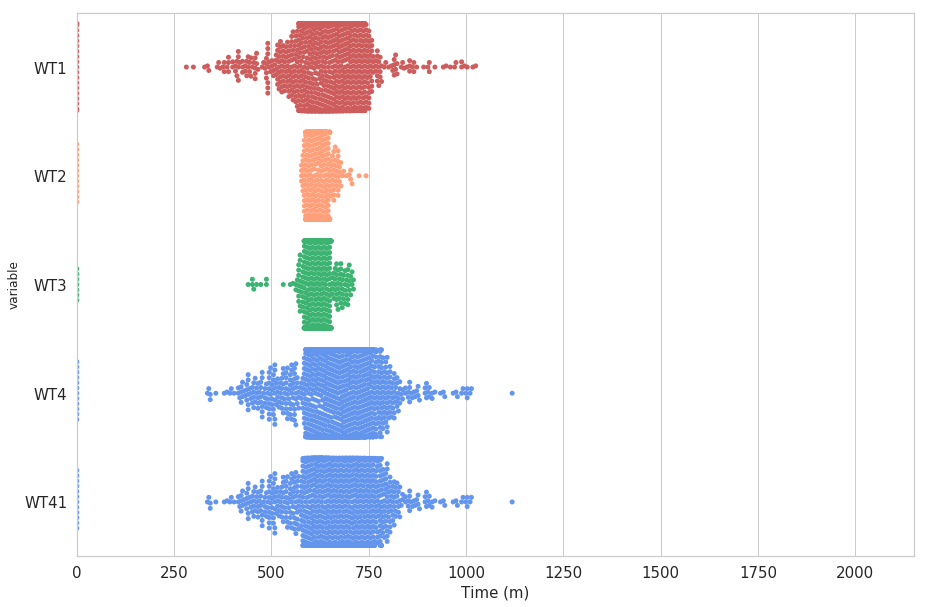

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,10))
my_pal = {"WT1": "indianred", "WT2": "lightsalmon", "WT3": "mediumseagreen",
          "WT4":"cornflowerblue", "WT41":"cornflowerblue"}
# my_pal1 = {"wt0": "red", "a200":"blue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
# b = sns.swarmplot(x="value", y="variable", data=dfclus0, zorder=2, palette=my_pal1)
b.set_xlabel("Time (m)",fontsize=15)
# b.set_ylabel("Mode 1 Degeneracy",fontsize=15)
b.tick_params(labelsize=15)
plt.xlim(xmax = 2150, xmin = 0)
# plt.savefig('figs/Cluster0/pmlkl_100tnf_clus0box_wswarm_5720_modnew.pdf')
plt.show()

In [ ]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for n in range(len(c3)):
    plt.plot(tspan/60, mode1df_wtm3.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color = 'darkorange',
             zorder = 1, alpha = 0.5)
for n in range(len(all_parsc3all)):
    plt.plot(tspan/60, mode1df_wtm31.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, color = 'blue',
             zorder = 1, alpha = 0.5)    
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.tight_layout()
# plt.savefig('pmlkl_allpars_mode2was4_tnf100_nogridlightsalmonwdata.pdf')
plt.show() 

In [ ]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(c2)):
    plt.plot(tspan/60, mode1df_wtm2.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'blue')
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
plt.tight_layout()
# plt.savefig('mode4_pmlkl_allpars_bluecolor_nogridwdata.pdf')
plt.show() 

In [ ]:
x = np.array([0, 30, 90, 270,480, 720, 960])
y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882, 0.2798939020159581, .7797294067, 0.98])
fig, ax = plt.subplots(figsize = (6, 4))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
for n in range(len(c1)):
    plt.plot(tspan/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544,
             color = 'darkgreen', lw=2)
plt.xlabel("Time (h)", fontsize=20)
plt.ylabel("pMLKL", fontsize=20)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.grid(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.set_yticks([0, 0.5, 1.0])
plt.plot(x/60, y100, 'o', color = 'black', ms = 10)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('mode3_pmlkl_allpars_medaquacolor_nogridwdata.pdf')
plt.show() 

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode0df = pd.DataFrame({'WT': ttd0,
                       'species': 'pMLKL0'})
dfclus0n = pd.DataFrame(data = mode0df, columns = ['WT0'])
dfclus0n = pd.melt(dfclus0n)

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttd1,
                       'species': 'pMLKL1'})
dfclus1n = pd.DataFrame(data = mode1df, columns = ['WT1'])
dfclus1n = pd.melt(dfclus1n)

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode2df = pd.DataFrame({'WT': ttd2,
                       'species': 'pMLKL2'})
dfclus2n = pd.DataFrame(data = mode2df, columns = ['WT2'])
dfclus2n = pd.melt(dfclus2n)

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode3df = pd.DataFrame({'WT': ttd3,
                       'species': 'pMLKL3'})
dfclus3n = pd.DataFrame(data = mode3df, columns = [ 'WT3'])
dfclus3n = pd.melt(dfclus3n)

In [ ]:
frame = [mode0df,mode1df,mode2df,mode3df]
dfall = pd.DataFrame(data = pd.concat(frame), columns = ['species','WT'])
dfmall = pd.melt(dfall, id_vars=["species"])

In [ ]:
plt.figure(figsize = (7,7))
sns.stripplot(data=dfmall, y="species", x="value", hue="variable", dodge=True, orient = 'h',linewidth=0.5,size=10)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

In [ ]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# my_pal = {"WT": "mediumaquamarine", "CYLDKO": "limegreen", "A20KO":"darkgreen"}
# my_pal = {"WT0": "blue", "CYLD KO": "cornflowerblue", "A20 KO":"darkblue", 'CYLD;A20 DKO': 'skyblue'}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
a = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2) #, palette=my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus1n, zorder=2)
c = sns.swarmplot(x="value", y="variable", data=dfclus2n, zorder=2)
d = sns.swarmplot(x="value", y="variable", data=dfclus3n, zorder=2)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
# b.set_ylabel('')
# b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
# b.tick_params(labelsize=25)
plt.xlim(xmax = 2150, xmin = 0)
ax.set_xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
# ax.set_xticks([0, 300, 600, 900,1200,1500, 1800, 2100])
# ax.set_xticklabels(['0', '300','600', '900','1200','1500', '1800', 'inf']) #$\infty$
# ax.set_yticklabels(['0', '600', '1200', '1800', 'inf']) #$\infty$
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode4was2_swarm_bluecolors.pdf')
plt.show()

In [ ]:
plt.figure()
sns.stripplot(data=dfclus0n, dodge=True, 
              orient = 'h',linewidth=0.5,size=7)
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')